# Proyecto 1

In [114]:
#!pip install scikit-learn

In [115]:
# importar pandas numpy sklearn
import pandas as pd
import numpy as np

El siguiente trabajo esta basado en el artículo Miller, C.A., Settle, S.H., Sulman, E.P. et al. Discovering functional modules by identifying recurrent and mutually exclusive mutational patterns in tumors. BMC Med Genomics 4, 34 (2011). https://doi.org/10.1186/1755-8794-4-34

En el cual desarrollaron un método para detectar automáticamente módulos funcionales en tumores basandose únicamente en patrones de aberración genómica recurrente. 

Resulta interesante debido a que los proyectos de caracterización de tumores están empezando a producir un gran volumen de datos sobre aberraciones genómicas, epigenómicas y de expresión génica en muestras tumorales. Este volumen de información sin precedentes tiene el potencial de transformar nuestra comprensión de la biología del cáncer, revelar nuevos biomarcadores y dianas farmacológicas y acelerar el desarrollo de nuevas terapias contra el cáncer.


En el artículo describe la métodología para obtener la matriz de mutación de la colección CGA de 145 muestras de glioblastoma. Para esto usaron en R el paquete DNAcopy, descargarmos algunos ejemplares en la carpeta genomica del repositorio, e intentamos ver los datos en analysis.r sin mucho exito.

Afortudamente el artículo nos comparte la matriz de mutación.

In [116]:
link_database = ' http://brl.bcm.tmc.edu/rme/gbm.dat'

# Descarga el archivo de la base de datos
import urllib.request
urllib.request.urlretrieve(link_database, 'gbm.dat')

('gbm.dat', <http.client.HTTPMessage at 0x17da89f3210>)

In [117]:
# Lee el archivo con pandas
data = pd.read_csv('gbm.dat', sep='\t')
columns = data.columns
data.describe()

,TCGA-02-0001,TCGA-02-0003,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,TCGA-02-0016,...,TCGA-08-0373,TCGA-08-0375,TCGA-08-0380,TCGA-08-0386,TCGA-08-0389,TCGA-08-0390,TCGA-12-0616,TCGA-12-0618,TCGA-12-0619,TCGA-12-0620
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,...,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,0.012915,0.044280,0.012915,0.083026,0.018450,0.127306,0.014760,0.062731,0.081181,0.068266,...,0.011070,0.036900,0.020295,0.007380,0.029520,0.020295,0.009225,0.018450,0.011070,0.014760
std,0.113013,0.205908,0.113013,0.276176,0.134697,0.333624,0.120703,0.242702,0.273365,0.252434,...,0.104727,0.188691,0.141138,0.085669,0.169416,0.141138,0.095692,0.134697,0.104727,0.120703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
data.head()

,Unnamed: 0,TCGA-02-0001,TCGA-02-0003,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,...,TCGA-08-0373,TCGA-08-0375,TCGA-08-0380,TCGA-08-0386,TCGA-08-0389,TCGA-08-0390,TCGA-12-0616,TCGA-12-0618,TCGA-12-0619,TCGA-12-0620
0,ZNF708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,XPOT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RNF38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCT2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,INSR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
data

,Unnamed: 0,TCGA-02-0001,TCGA-02-0003,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,...,TCGA-08-0373,TCGA-08-0375,TCGA-08-0380,TCGA-08-0386,TCGA-08-0389,TCGA-08-0390,TCGA-12-0616,TCGA-12-0618,TCGA-12-0619,TCGA-12-0620
0,ZNF708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,XPOT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RNF38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCT2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,INSR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,DLL3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,DOCK8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539,chr6:166018727-166026434,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
540,DST,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Constructing a gene network with Winnow

El primer paso en nuestro proceso de detección de módulos fue filtrar la matriz de mutaciones y retener sólo los genes que cumplen una frecuencia de recurrencia establecida, ya que los genes alterados en sólo una o unas pocas muestras no contienen suficiente información para calcular puntuaciones de exclusividad significativas.

In [120]:
filtered_data = data.loc[:, (data != 0).sum() > 6]
filtered_data

,Unnamed: 0,TCGA-02-0001,TCGA-02-0003,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,...,TCGA-08-0356,TCGA-08-0357,TCGA-08-0358,TCGA-08-0359,TCGA-08-0375,TCGA-08-0380,TCGA-08-0389,TCGA-08-0390,TCGA-12-0618,TCGA-12-0620
0,ZNF708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,XPOT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RNF38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCT2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,INSR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,DLL3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,DOCK8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539,chr6:166018727-166026434,0,1,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
540,DST,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# Diferencia entre los datos originales y los datos filtrados
print(data.shape)
print(filtered_data.shape)

(542, 146)
(542, 113)


In [122]:
# Calculate the exclusivity score between each pair of genes, defined as the number of samples where exactly one of the pair is mutated divided by the number of samples where at least one of the pair is mutated.

# Diccionario sample -> genes mutados
sample_genes = {}

num_exclusive_samples = 0
num_samples = 0

# Recorre las muestras y muestra los genes que estan mutados
for index, row in filtered_data.iterrows():
    num_samples = len(row[row != 0])
    sample_genes[index] = row[row != 0]
    #gen = row[0], sample = row[1:]
    #print(sample_genes[index])
    print('Mutated genes:', row[row != 0]['Unnamed: 0'])
    print("Samples with at least one mutation:", num_samples)
    if num_samples == 1:
        num_exclusive_samples += 1

Mutated genes: ZNF708
Samples with at least one mutation: 7
Mutated genes: XPOT
Samples with at least one mutation: 2
Mutated genes: RNF38
Samples with at least one mutation: 2
Mutated genes: CCT2
Samples with at least one mutation: 2
Mutated genes: INSR
Samples with at least one mutation: 1
Mutated genes: ESR2
Samples with at least one mutation: 2
Mutated genes: ATP1A2
Samples with at least one mutation: 2
Mutated genes: DGKD
Samples with at least one mutation: 2
Mutated genes: chr6:168107192-168276703
Samples with at least one mutation: 16
Mutated genes: GYPA
Samples with at least one mutation: 3
Mutated genes: MN1
Samples with at least one mutation: 12
Mutated genes: RADIL
Samples with at least one mutation: 3
Mutated genes: TRIM24
Samples with at least one mutation: 2
Mutated genes: GYPB
Samples with at least one mutation: 2
Mutated genes: PHIP
Samples with at least one mutation: 2
Mutated genes: chr6:164016427-164050128
Samples with at least one mutation: 22
Mutated genes: USF1
Sa

In [123]:
for sample, genes in sample_genes.items():
    print('Gene:', genes['Unnamed: 0'])
    print(sample_genes[sample])

Gene: ZNF708
Unnamed: 0      ZNF708
TCGA-02-0055         1
TCGA-06-0143         1
TCGA-06-0159         1
TCGA-06-0169         1
TCGA-06-0173         1
TCGA-06-0190         1
Name: 0, dtype: object
Gene: XPOT
Unnamed: 0      XPOT
TCGA-06-0176       1
Name: 1, dtype: object
Gene: RNF38
Unnamed: 0      RNF38
TCGA-06-0138        1
Name: 2, dtype: object
Gene: CCT2
Unnamed: 0      CCT2
TCGA-02-0099       1
Name: 3, dtype: object
Gene: INSR
Unnamed: 0    INSR
Name: 4, dtype: object
Gene: ESR2
Unnamed: 0      ESR2
TCGA-02-0011       1
Name: 5, dtype: object
Gene: ATP1A2
Unnamed: 0      ATP1A2
TCGA-02-0083         1
Name: 6, dtype: object
Gene: DGKD
Unnamed: 0      DGKD
TCGA-02-0114       1
Name: 7, dtype: object
Gene: chr6:168107192-168276703
Unnamed: 0      chr6:168107192-168276703
TCGA-02-0003                           1
TCGA-02-0007                           1
TCGA-02-0015                           1
TCGA-02-0027                           1
TCGA-02-0058                           1
TCGA-02-

In [124]:
# Calculate the exclusivity score between each pair of genes, defined as the number of samples where exactly one of the pair is mutated divided by the number of samples where at least one of the pair is mutated.

# number of samples where at least one of the pair is mutated
num_samples = len(sample_genes)
print('Number of samples:', num_samples)

# number of samples where exactly one of the pair is mutated
print('Number of exclusive samples:', num_exclusive_samples)

# Calculate the exclusivity score between each pair of genes
exclusivity_scores = np.zeros((len(filtered_data.columns), len(filtered_data.columns)))
for i, gene1 in enumerate(filtered_data.columns):
    for j, gene2 in enumerate(filtered_data.columns):
        if i == j:
            continue
        num_samples_where_both_mutated = 0
        num_samples_where_one_mutated = 0
        for sample, genes in sample_genes.items():
            if gene1 in genes and gene2 in genes:
                num_samples_where_both_mutated += 1
            if gene1 in genes or gene2 in genes:
                num_samples_where_one_mutated += 1
        exclusivity_scores[i, j] = num_samples_where_both_mutated / num_samples_where_one_mutated


Number of samples: 542
Number of exclusive samples: 17


In [125]:
exclusivity_scores

array([[0.        , 0.01291513, 0.04428044, ..., 0.0202952 , 0.01845018,
        0.01476015],
       [0.01291513, 0.        , 0.10714286, ..., 0.125     , 0.30769231,
        0.25      ],
       [0.04428044, 0.10714286, 0.        , ..., 0.12903226, 0.21428571,
        0.03225806],
       ...,
       [0.0202952 , 0.125     , 0.12903226, ..., 0.        , 0.10526316,
        0.05555556],
       [0.01845018, 0.30769231, 0.21428571, ..., 0.10526316, 0.        ,
        0.2       ],
       [0.01476015, 0.25      , 0.03225806, ..., 0.05555556, 0.2       ,
        0.        ]])

These data could be used to create a network where each node is a gene and each edge weight is the exclusivity between the genes.
The highly connected sub-networks would then be used as a starting point for a focused combinatorial search for modules. The disadvantage of this approach is that the networks quickly becomes much too large and densely connected to effectively identify sub-network

In [126]:
import networkx as nx
import matplotlib.pyplot as plt

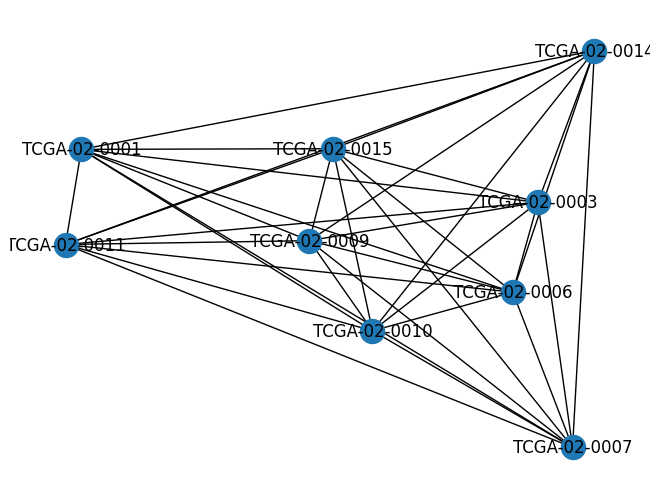

In [127]:
# These data could be used to create a network where each node is a gene and each edge weight is the exclusivity between the genes.
#The highly connected sub-networks would then be used as a starting point for a focused combinatorial search for modules. The disadvantage of this approach is that the networks quickly becomes much too large and densely connected to effectively identify sub-network

def network_from_exclusivity_scores(exclusivity_scores, genes):
    G = nx.Graph()
    for i, gene1 in enumerate(genes):
        for j, gene2 in enumerate(genes):
            if i == j:
                continue
            G.add_edge(gene1, gene2, weight=exclusivity_scores[i, j])

    pos = nx.spring_layout(G)
    nx.draw(G, pos)
    # Labels en los nodos
    nx.draw_networkx_labels(G, pos)
    plt.show()

network_from_exclusivity_scores(exclusivity_scores, filtered_data.columns[1:10])

These data could be used to create a network where each node is a gene and
each edge weight is the exclusivity between the genes.
The highly connected sub-networks would then be used
as a starting point for a focused combinatorial search for
modules. The disadvantage of this approach is that the
networks quickly becomes much too large and densely
connected to effectively identify sub-networks

Thus, we used an online-learning linear threshold algorithm called Winnow to detect signals of exclusivity against the noisy background of passenger mutations in many irrelevant genes

The Winnow algorithm is a linear threshold algorithm that is used for online learning. It is a variant of the Perceptron algorithm that is designed to work with binary features. The algorithm is based on the idea of a “window” of features that are used to make a prediction. The window is updated at each iteration of the algorithm, and the weights of the features are updated based on the prediction made by the algorithm.


The Winnow algorithm was run in an online setting, using one gene as a classifier and the rest of the mutation array as training data.